# Processing Retinal Images

The purpose of this script is to properly resize, format, and augment all the retinal images to be uniform and ready to be cropped into a full-fledged dataset. All images will be made 512 x 512.

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import
from PIL import Image, ImageOps
import numpy as np
import os
import matplotlib.pyplot as plt
import random

The following functions will be all that are needed for processing:

In [3]:
# A function to properly resize and pad the images

def resize_and_pad(img, target_size, pad_color=0):

    # Dimensions
    original_width, original_height = img.size
    target_width, target_height = target_size

    # Calculate the ratio and new dimensions
    ratio = min(target_width / original_width, target_height / original_height)
    new_width = int(original_width * ratio)
    new_height = int(original_height * ratio)

    # Resize the image while maintaining aspect ratio and add padding to fit the target size.
    img = img.resize((new_width, new_height), Image.ANTIALIAS)

    # Create a new image with the specified size and black background
    new_img = Image.new('L', target_size, pad_color)
    # Paste the resized image onto the center of the new image
    new_img.paste(img, ((target_width - new_width) // 2, (target_height - new_height) // 2))

    return new_img

In [4]:
# A function for vertical or horizontal augmentation

def augment_image(img, output_path, flip_direction='horizontal'):

    # Automatically set to be horizontal only
    if flip_direction == 'horizontal':
        aug_img = ImageOps.mirror(img)
    else:  # vertical flip
        aug_img = ImageOps.flip(img)

    aug_img.save(output_path)

In [5]:
# A function that rocesses and properly saves the images: resize, pad, convert to grayscale, and normalize

def process_images(image_dir, output_dir, dims=(512, 512), augment=False):

    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for filename in os.listdir(image_dir):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.gif')):
            img = Image.open(os.path.join(image_dir, filename)).convert('L')
            img = resize_and_pad(img, dims) # dimensions used to be 564, 584
            # Normalize pixel values
            img_array = np.asarray(img) / 255.0
            # Save the processed image
            Image.fromarray((img_array * 255).astype(np.uint8)).save(os.path.join(output_dir, filename))

            # Apply augmentation if enabled
            if augment:
                # Define augmented image output path
                aug_output_path = os.path.join(output_dir, filename.split('.')[0] + '_aug1.' + filename.split('.')[1])
                augment_image(img, aug_output_path)

In [6]:
# Load, display random images, their histograms, and maximum pixel values from the specified directory.

def verify_images(image_dir):

    files = os.listdir(image_dir)
    selected_files = random.sample(files, 4) if len(files) > 4 else files

    fig, axes = plt.subplots(2, 4, figsize=(12, 6))
    for i, file in enumerate(selected_files):
        img_path = os.path.join(image_dir, file)
        img = Image.open(img_path)
        img_array = np.array(img)

        # Display image
        axes[0, i].imshow(img, cmap='gray')
        axes[0, i].set_title(f'Image {i+1}\nMax pixel value: {np.max(img_array)}')
        axes[0, i].axis('off')

        # Display histogram
        axes[1, i].hist(img_array.ravel(), bins=256, range=[0, 255], fc='k', ec='k')
        axes[1, i].set_title(f'Histogram {i+1}')

    plt.tight_layout()
    plt.show()

Create the processed images and place them in the proper folders:

In [7]:
# Define the path to the ML_projects folder
current_path = '/content/drive/My Drive/ML_projects/VesselProject'

# Change the current working directory to ML_projects
os.chdir(current_path)
current_path = os.getcwd()

In [8]:
# Generate the adjusted images

old_path = os.path.join(current_path, 'RetinalImages', 'Training', 'Images')
new_path = os.path.join(current_path, 'RetinalImages', 'Processed', 'Train', 'Images')
process_images(old_path, new_path, augment=True)
old_path = os.path.join(current_path, 'RetinalImages', 'Training', 'Masks')
new_path = os.path.join(current_path, 'RetinalImages', 'Processed', 'Train', 'Masks')
process_images(old_path, new_path, augment=True)

old_path = os.path.join(current_path, 'RetinalImages', 'Test', 'Images')
new_path = os.path.join(current_path, 'RetinalImages', 'Processed', 'Test', 'Images')
process_images(old_path, new_path)
old_path = os.path.join(current_path, 'RetinalImages', 'Test', 'Masks')
new_path = os.path.join(current_path, 'RetinalImages', 'Processed', 'Test', 'Masks')
process_images(old_path, new_path)

<ipython-input-3-ea4e3c8513ee>:15: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((new_width, new_height), Image.ANTIALIAS)


View examples of our work:

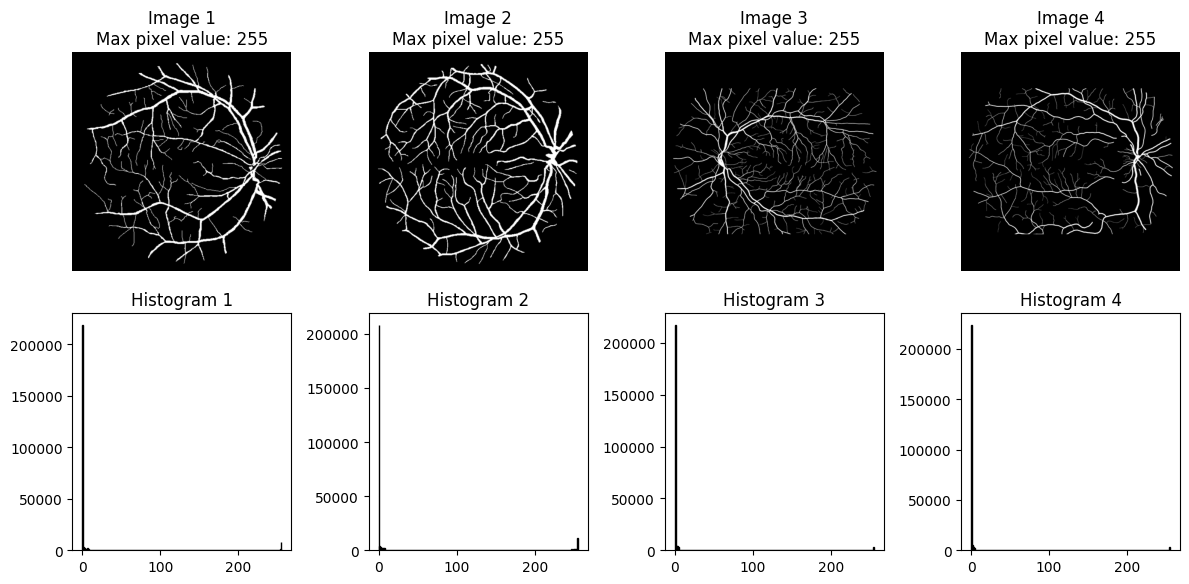

In [9]:
# Display
verify_images(new_path)